# Домашнее задание на тему "Визуализация"

Итак, вы хотите что-то визуализировать, чтобы получилось что-то красивое. Что ж, в таком случае вам сюда. Я буду визуализировать.
Но сначала все-таки импортирую несколько модулей.

In [145]:
import pandas as p
import json
import seaborn as sns
from pprint import pprint

Ура! Теперь приступим к заданиям.

## Задание 1

Откроем морфологический разбор текста по пайморфи. Создадим список из разборов каждого слова.

NB: в связи с тем, что мне нужны были немного другие данные, я слегка изменил код предыдущей домашки, чтобы можно было легче вывести нужные значения.

In [148]:
pymorph_words = []
with open('Luzhin_pymorphized.json', encoding='utf-8') as ana:
    wordlines = ana.readlines()
    for line in wordlines:
        pymorph_words.append(json.loads(line))

Теперь создадим датафрейм. Просто приписываем каждому элементу список, который пополняем вот как:

'word', 'normal_form' и 'score' можно самому написать. Но все ключи и значения tagа как-то лень. Ну вот мы берем и, сначала поплнив каждый список, создаем новые пустые списки, проходясь по каждому ключу в tagе (это только когда мы начали работу и в tagе нашего нового словаря нет никаких ключей).

Ну а теперь, если есть значение в ключе, то пишем его, а если нет -- пишем пустую строку.

In [143]:
df_dict = {}
df_dict['word'] = []
df_dict['normal_form'] = []
df_dict['score'] = []
for i, word in enumerate(pymorph_words):
    df_dict['word'].append(word['word'])
    df_dict['normal_form'].append(word['vars'][0]['normal_form'])
    df_dict['score'].append(word['vars'][0]['score'])
    if i == 0:
        for key in word['vars'][0]['tag'].keys():
            df_dict[key] = []
    for i, key in enumerate(word['vars'][0]['tag'].keys()):
        if word['vars'][0]['tag'][key]:
            df_dict[key].append(word['vars'][0]['tag'][key])
        else:
            df_dict[key].append('')

Что, ура? Ну смотрим.

In [144]:
df = p.DataFrame(df_dict)
df

,word,normal_form,score,POS,animacy,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,1,1,1.000000,,,,,,,,,,,
1,больше,большой,0.800000,COMP,,,,,,,,,,
2,всего,всего,0.200000,ADVB,,,,,,,,,,
3,его,он,0.234042,NPRO,,accs,masc,,,sing,3per,,,
4,поразило,поразить,1.000000,VERB,,,neut,,indc,sing,,past,tran,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67683,александра,александр,0.333333,NOUN,anim,gent,masc,,,sing,,,,
67684,ивановича,иван,0.500000,NOUN,anim,gent,masc,,,sing,,,,
67685,не,не,1.000000,PRCL,,,,,,,,,,
67686,было,быть,0.963576,VERB,,,neut,,indc,sing,,past,intr,


Ура!

## Задание 2

Сначала импортирует matplotlib.pyplot, чтобы можно было хоть что-то построить.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Я хочу посмотреть на то, сколько глаголов какого времени во всем тексте.

Text(0, 0.5, 'количество')

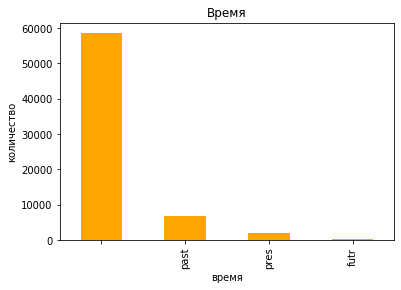

In [128]:
df['tense'].value_counts().plot.bar(color='orange');
plt.title('Время')
plt.xlabel('время')
plt.ylabel('количество')

Ну довольно ожидаемо, что тут сказать-то...

Давайте теперь посмотрим, слов какой длины у Набокова больше (стоп-слова убираем):

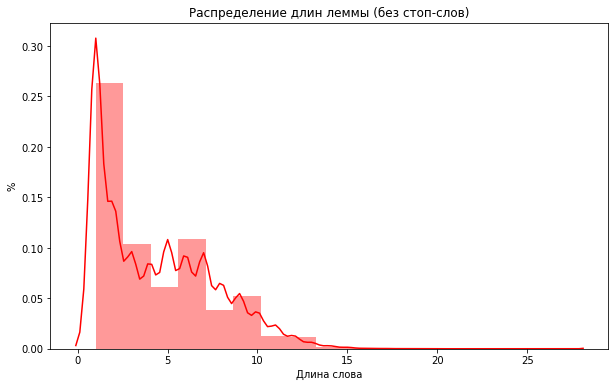

In [134]:
from nltk.corpus import stopwords
stops = set(stopwords.words('russian') + ['это', 'он', 'весь', 'который', 'мочь', 'свой'])

df_stop = {}
for key in df_dict:
    df_stop[key] = []
for k in df_dict:
    for i, v in enumerate(df_dict[k]):
        if df_dict['normal_form'][i] not in stops:
            for key in df_dict:
                df_stop[key].append(df_dict[key][i])
df_stop = p.DataFrame(df_stop)
df_stop

df['length'] = df['normal_form'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df['length'], bins=17, color='red')
plt.title('Распределение длин леммы (без стоп-слов)')
plt.ylabel('%')
plt.xlabel('Длина слова');

Вордклауды мои вордклауды.

In [135]:
from wordcloud import WordCloud

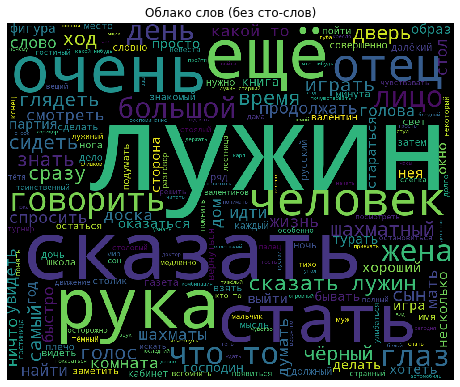

In [137]:
text = ' '.join([word for word in df['normal_form'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='black',
    width = 1000,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (без сто-слов)')
plt.show()

Забавно, что часто встречаются части тела (глаз, рука, голова, лицо). То, что чаще всего встречается "лужин" -- вообще не странно. Как и слово "шахматный". Слово "турать" -- явная ошибка, произошедшая из фамилии одного из шахматистов -- Турати.

## Задание 3

Я хочу посмотреть вот что -- в каких падежах чаще всего стоит Лужин? Создаем датафрейм, где единственное слово -- Лужин.

In [65]:
df_dict2 = {}
for key in df_dict:
    df_dict2[key] = []
for k in df_dict:
    for i, v in enumerate(df_dict[k]):
        if df_dict['normal_form'][i] == 'лужин':
            for key in df_dict:
                df_dict2[key].append(df_dict[key][i])
df2 = p.DataFrame(df_dict2)
df2

,word,normal_form,score,POS,animacy,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
1,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
2,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
3,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
4,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
9684,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
9685,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,
9686,лужин,лужин,0.346154,NOUN,inan,nomn,masc,,,sing,,,,


Я использую пайчарт, т.к. на нем достаточно наглядно показывается соотношение количеств, что мне как раз и нужно.

Смотрим:

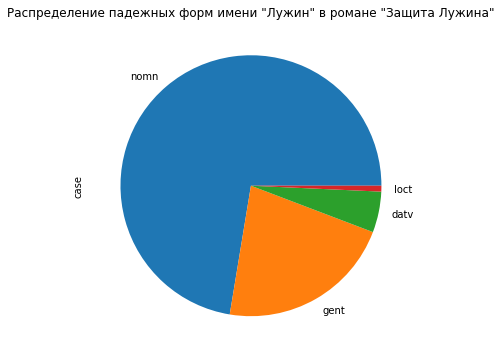

In [68]:
plt.figure(figsize=(6, 6))
df2['case'].value_counts().plot(kind='pie');
plt.title('Распределение падежных форм имени "Лужин" в романе "Защита Лужина"');

Зачем я это сделал? Не очень ясно. Зато интересно, что ни творительный, ни винительный не появлялись по мнению пайморфи достаточно часто, чтобы быть в диаграмме. Вероятнее всего, он просто посчитал все случаи винительного падежа за родительный, т.к. они омонимичны. Вывод: ему есть куда стремиться.

А еще я хочу посмотреть отдельно на глаголы. Создаю датафрейм из глаголов.

In [122]:
df_dict3 = {}
for key in df_dict:
    df_dict3[key] = []
for k in df_dict:
    for i, v in enumerate(df_dict[k]):
        if df_dict['POS'][i] == 'VERB':
            for key in df_dict:
                df_dict3[key].append(df_dict[key][i])
df3 = p.DataFrame(df_dict3)
df3

,word,normal_form,score,POS,animacy,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,поразило,поразить,1.000000,VERB,,,neut,,indc,sing,,past,tran,
1,будет,быть,1.000000,VERB,,,,,indc,sing,3per,futr,intr,
2,вышел,выйти,1.000000,VERB,,,masc,,indc,sing,,past,intr,
3,вернулся,вернуться,1.000000,VERB,,,masc,,indc,sing,,past,intr,
4,приподнялась,приподняться,1.000000,VERB,,,femn,,indc,sing,,past,intr,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98387,увидел,увидеть,1.000000,VERB,,,masc,,indc,sing,,past,tran,
98388,раскинулась,раскинуться,1.000000,VERB,,,femn,,indc,sing,,past,intr,
98389,выбили,выбить,1.000000,VERB,,,,,indc,plur,,past,tran,
98390,заревело,зареветь,1.000000,VERB,,,neut,,indc,sing,,past,intr,


Строю боксплот: как зависит длина глагола от его рода?

Я использую боксплот, т.к. хочу увидеть, отличаются ли верхние и нижние пороги в зависимости от рода. По оси y у нас длина слова, т.е. численные значения, а по оси x -- род, т.е. набор категорий.

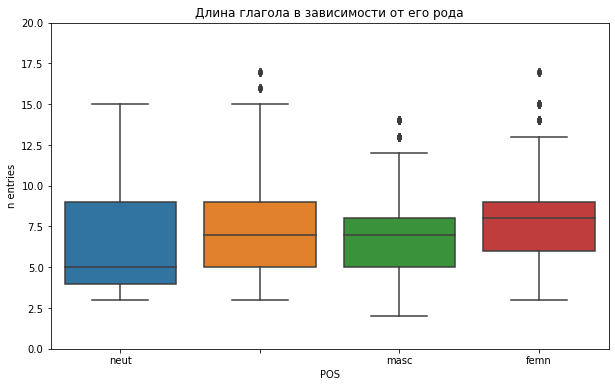

In [138]:
df3['length'] = df3['word'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="length", data=df3)
plt.ylim((0, 20))
plt.title('Длина глагола в зависимости от его рода')
plt.ylabel('n entries')
plt.xlabel('POS');

Женский род обычно длиннее мужского -- неудивительно. Но не очень понятно, почему для среднего рода нижний порог гораздо ниже остальных. Возможно, в среднем роде в целом чаще стоят более короткие глаголы?

## Задание 4

Тут все более-менее тривиально. Добавляем нужные модули и используем функцию dispertion_plot, где words -- это список лемм текста. Смотрим:

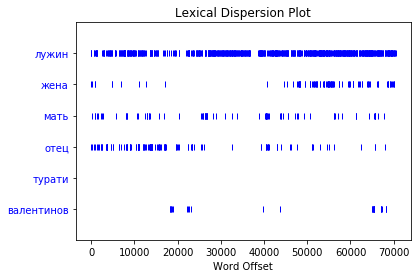

In [116]:
from pymystem3 import Mystem
m = Mystem()
from nltk.draw.dispersion import dispersion_plot

words = m.lemmatize(text)
dispersion_plot(words, ['лужин', 'жена', 'мать', 'отец', 'турати', 'валентинов'])

*Миша Сонькин*